# <font color="#3A40A2">📘 Algoritmos básico de clustering - Parte práctica </font>

**Materia: Ciencia de Datos aplicada a los Negocios - Universidad de San Andrés**

**Autor: [Lucas BALDEZZARI](https://www.linkedin.com/in/lucasbaldezzari/)**

**2025**

> Este material es para fines educativos y no debe ser utilizado para fines comerciales. El contenido pertenece a la *Universidad de San Andrés* y no debe ser reproducido sin el permiso explícito de la institución y del autor de este repositorio quien es [LUCAS BALDEZZARI](https://www.linkedin.com/feed/).

---



## <font color="#004eb3">Temas de la Colab</font>

Para esta clase, los temas que veremos son:

- Algoritmos de K-means y K-medoids.
- Comparativa entre K-means y K-medoids
- Inercia y método del codo para determinar el número de clústeres óptimos.

Es importante prestar atención a los siguientes íconos o emojis que aparezcan a lo largo de la Colab.

- 📘 **Teoría**: Conceptos teóricos.
- 📚 **Lectura**: Material adicional que puedes consultar para profundizar en el tema.
- 📊 **Ejemplo**: Ejemplo para demostrar y/o reforzar conceptos.
- 🔗 **Enlace**: Recursos externos que puedes visitar para obtener más información.
- ❓ **Pregunta**: Preguntas disparadas a lo largo del contenido para reflexionar sobre los ejemplos y conceptos tratados.
- 💻 **Código**: Indica que la celda de abajo es una celda con código y debe ser ejecutada para ver su contenido.

## 📘 <font color="#00b351">K-means</font>

Hemos dicho que K-means es un algoritmo de *aprendizaje no supervisado* que permite agrupar datos en grupos o clústeres, sin necesidad de conocer previamente etiquetas o categorías.

El objetivo principal es encontrar patrones por similitud en nuestros datos, organizándolos en k grupos distintos. Se supone que cada grupo reúne elementos que son más similares entre sí que con los elementos de otros grupos.

---❓--- 

1. En este contexto, ¿qué crees que significa "similares entre sí"?
2. 2. ¿Cómo podríamos definir la similitud entre dos elementos?

---❓---

Podemos usar K-means cuando quisiéramos descubrir patrones o segmentos que se dan de forma natural en nuestros datos, sin necesidad de tener reglas o categorías predefinidas.

#### <font color="#4e00b3">Aplicaciones posibles</font>

Podríamos tener una base de datos de clientes con información sobre:

- Edad
- Sexo
- Frecuencia de compra
- Gasto promedio
- Ocupación
- Nivel educativo
- Ingreso promedio
- Entre muchas otras.


Con K-means podríamos agrupar clientes en base a:

- Clientes frecuentes y de gasto alto.
- Clientes nuevos con comportamiento incierto.
- Clientes que compran periódicamente.
- Y mucho más.

#### <font color="#4e00b3">Funcionamiento básico de K-means</font>

De manera resumida, el algoritmo de K-means lleva a cabo los siguientes pasos:

1. Se elige un número 𝐾 de grupos/clúster que queremos formar.
2. Se inicializan 𝐾 centros –centroides- de manera aleatoria en nuestros datos.
3. Se asigna cada observación al centro más cercano -en general usando distancia euclidiana-.
4. Recalculamos los centros de cada grupo como el promedio de todos los puntos asignados a él.
5. Se repiten los pasos 3 y 4 hasta que los centroides no se muevan (convergencia), lo hagan muy poco o bien luego de una cierta cantidad de iteraciones.

> **El algoritmo busca minimizar la distancia total entre las observaciones y el centroide de su grupo.**

Podes ver un ejemplo de cómo funciona K-means en el siguiente video:

---🔗--- [StatQuest with Josh Starmer - K-means Clustering](https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer) ---🔗--- 

#### 📊 **<font color="#d6b302">Ejemplo de agrupamiento</font>**

En este ejemplo, veremos cómo funciona K-means al agrupar puntos de un set de datos bidimensional.

La idea de este ejemplo es

- Entender visualmente cómo agrupa K-means.
- Entender que K-means no siempre puede converger al resultado óptimo.

💻 **Instalando dependencias necesarias** 💻

Por favor, ejecuta la siguiente celda de código para instalar las dependencias necesarias. <font color="#0303bc">Esto puede llevar algunos minutos, por favor se paciente.</font>

<font color="#b30018">**IMPORTANTE**: Sólo ejecutar la celda una vez.</font>

In [25]:
# import sys, subprocess, os

# subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "--force-reinstall",
#                        "numpy==1.26.4",
#                        "scikit-learn==1.3.2",
#                        "scikit-learn-extra==0.3.0"])

# os.kill(os.getpid(), 9)

La celda anterior instala las dependencias para la clase de hoy y finalmente **reinicia** el entorno, por lo tanto, no te sustes si ves un mensaje del tipo 
> <font color="#031fbc">*"Your session crashed for an unknown reason"*</font>

Una vez ejecutada y terminada la celda anterior, ya estamos en condiciones de ejecutar las celdas restantes.

💻 **Clonando repositorio** 💻

Ejecuta la siguiente celda para clonar el repositorio con los archivos necesarios para esta clase.

In [26]:
## **** CÓDIGO PYTHON ****

##Clonamos el repositorio para poder usar las funciones
## Esperar unos segundos hasta ver un 100% de descarga
# !git clone https://github.com/lucasbaldezzari/cdan.git

##importamos las funciones a usar
from funciones.algoritmos_basicos import *
from funciones.utils import * ##importo funciones a usar

💻 **Graficando nuestros datos** 💻

Ejecutemos la siguiente celda para graficar los datos que usaremos de ejemplo.

IMPORTANTE: Los datos han sido normalizados para que K-means funcione mejor. Por eso hay valores negativos en el eje de gasto mensual.

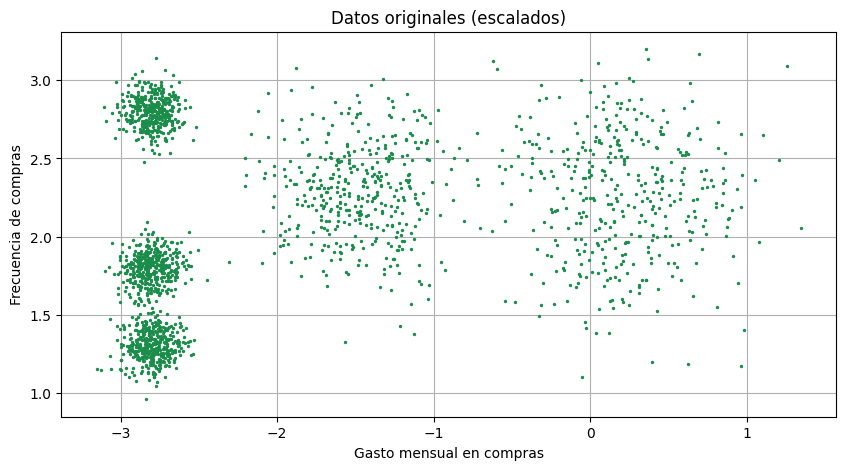

In [27]:
makeAndPlotBlobs()

💻 **Agrupando con K-means** 💻

Perfecto, hemos generado un conjunto de datos. A continuación, usaremos K-means para agruparlos. Usaremos $K=4$, sin embargo, podes probar con otros valores de K para ver cómo cambia el resultado.

Por favor, ejecuta la siguiente celda para ver cómo K-means agrupa los datos.

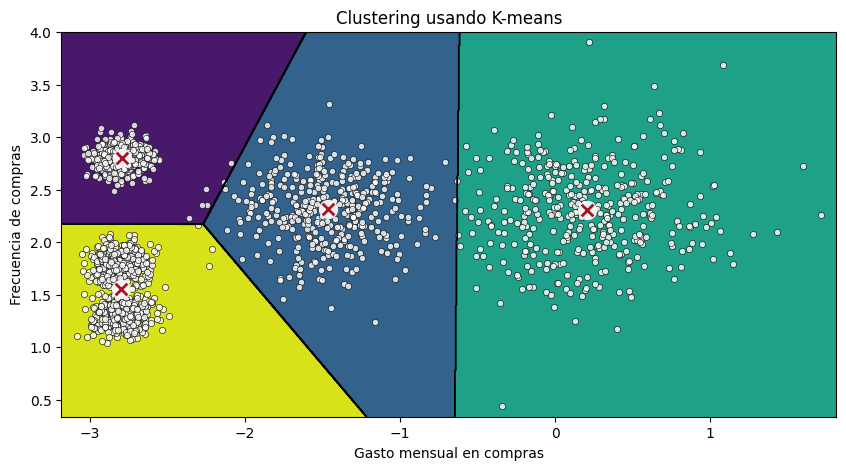

In [28]:
K=4
clusteringAndPlot(K, random_state=48)

---❓--- 

En base al gráfico anterior:

1. ¿Crees que K-means ha hecho un buen trabajo agrupando los datos en $K=4$ grupos?
2. ¿Qué podes decir del grupo que se encuentra en la parte izquierda y abajo del gráfico? ¿Es un sólo grupo? ¿Son dos grupos?
3. ¿Qué pasaría si usáramos $K=3$ o $K=5$? ¿Donde crees que estarán los nuevos centroides? Modifica el valor de $K$ de la celda anterior y probá. **Pero antes intenta responder sin ejecutar la celda.**

---❓---

#### 📊 **<font color="#d63002">K-means no siempre converge</font>**

Sabemos que K-means tiene algunas ventajas, como ser:

- Simple y rápido para conjunto de datos grandes.
- Fácil de interpretar: cada grupo tiene un “centro” que lo representa.
- Funciona bien cuando los grupos son esféricos y bien separados.

Sin embargo, también tiene algunas limitaciones, entre estas:
1. **Es necesario especificar un número 𝑘 de grupos.**
2. **Puede no converger si los centroides están mal elegidos.**
3. Es sensible a valores atípicos y a la escala de las variables (se recomienda normalizar variables).
4. No funciona nada bien cuando los grupos no tienen formas esféricas.


En lo que respecta al punto **1**, hemos visto en las celdas de códigos anteriores que diferentes valores de $K$ generan diferentes agrupamientos.

Por otro lado, y de mano con el punto **1**, el **2** también podría ser un problema. Sabemos que el algoritmo incializa los centroides de manera aleatoria (a menos que lo especifiquemos los centroides nosotros), y por lo tanto, si estos puntos están muy alejados K-means podría no converger al resultado óptimo.

💻 Convergencia **adecuada** 💻

Veamos un ejemplo donde K-means converge adecuadamente.

Por favor, ejecuta la siguiente celda para ver cómo K-means agrupa los datos.

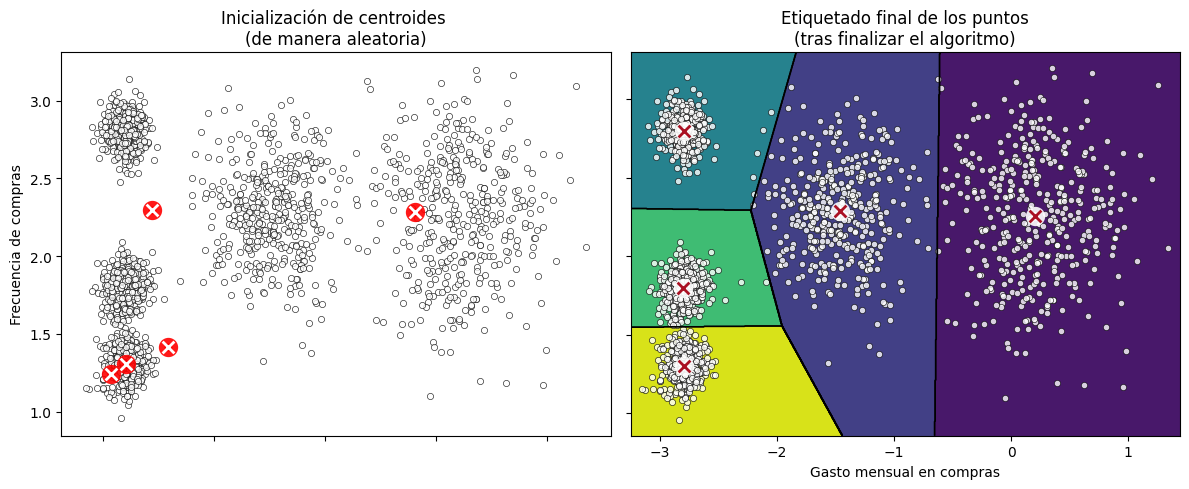

In [29]:
K = 5
showConvergencia(K=K)

💻 Convergencia **INadecuada** 💻

Ahora vamos a ver un caso donde K-means no converge adecuadamente.

Por favor, ejecuta la siguiente celda para ver cómo K-means agrupa los datos.

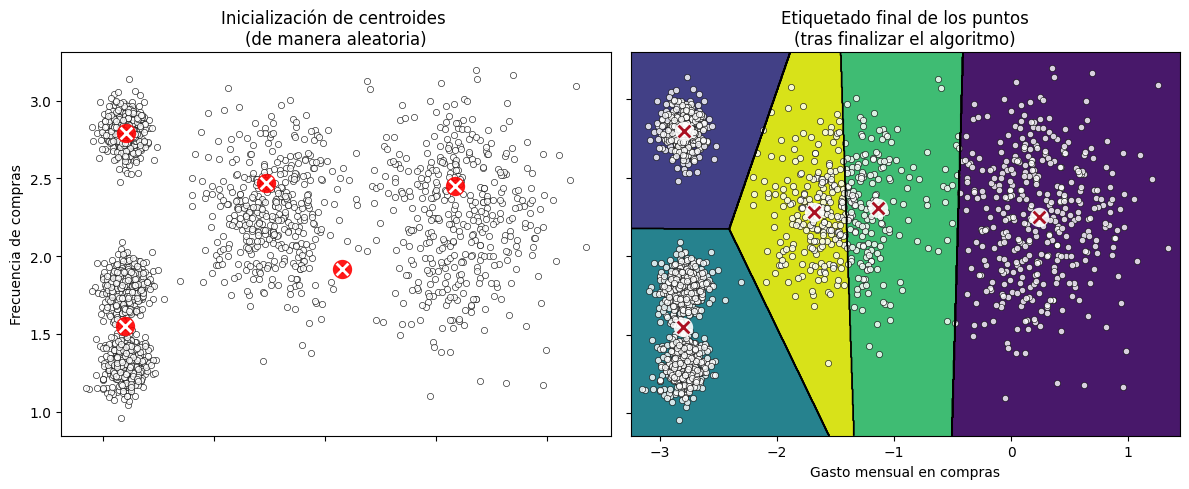

In [45]:
K=5
showConvergencia(K=K,numpyseed=58)

#### 📊 **<font color="#d6b302">¿K-means puede agrupar todos los datos de manera correcta?</font>**

Una pregunta que puede surgir es con K-means podemos agrupar todos los datos de manera correcta, incluso aquellos que están alejados de los centroides originales. Para intentar responder a esta pregunta, vamos a graficar los datos etiquetados en base a sus grupos originales, los resultados de la convergencia adecuada y la convergencia inadecuada.

💻 Grupos originales 💻

Ahora vamos a graficar los datos originales, los datos agrupados correctamente luego de una convergencia adecuada y los datos agrupados incorrectamente luego de una convergencia inadecuada.

Por favor, ejecuta la siguiente celda para ver los grupos originales.

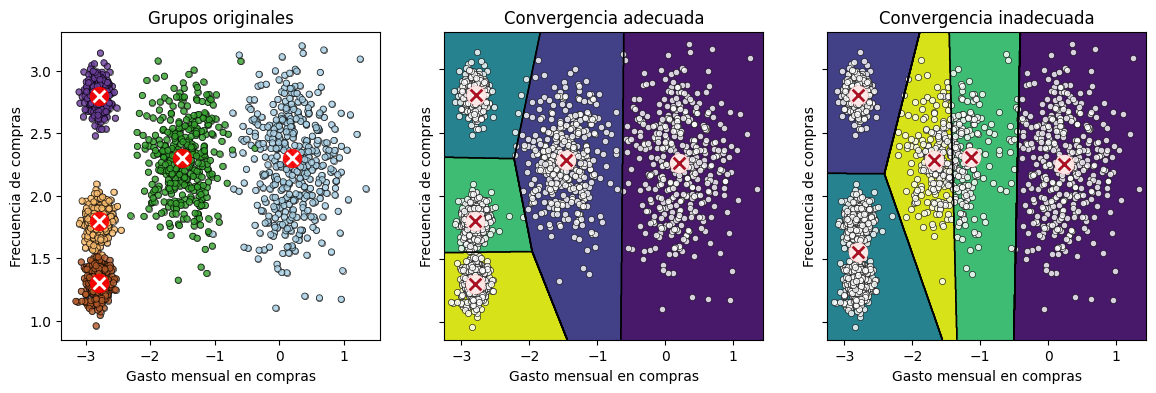

In [31]:
plotOriginalConverDiver(figsize=(14, 4),cmap="Paired")

---❓--- 

En base a los gráficos anteriores:

1. ¿Pudo K-means agrupar los datos correctamente en el caso de convergencia adecuada?
2. Observando los gráficos de *Grupos origniales* y el de *Convergencia Adecuada*, ¿crees que K-means podría agrupar correctamente aquellos puntos alejados de su centro original? ¿Por qué?

---❓---

#### 📊 **<font color="#d63002">K-means no es bueno tratando con outliers</font>**

Es muy común tener datos atípicos o *outliers* en nuestros conjuntos de datos. Estos puntos pueden influir negativamente en el resultado de K-means, ya que el algoritmo intenta minimizar la distancia total entre los puntos y sus centroides. Por otro lado, como sabemos, los centroides son el promedio de los puntos asignados a cada grupo, por lo que un outlier puede desplazar significativamente el centroide de un grupo.

Veamos esto con un ejemplo.

💻 Datos con outliers 💻

Vamos ahora a graficar un conjunto de datos con outliers. Estos puntos atípicos pueden influir en el resultado de K-means, ya que el algoritmo intenta minimizar la distancia total entre los puntos y sus centroides.

Por favor, ejecuta la siguiente celda para ver los datos con outliers.

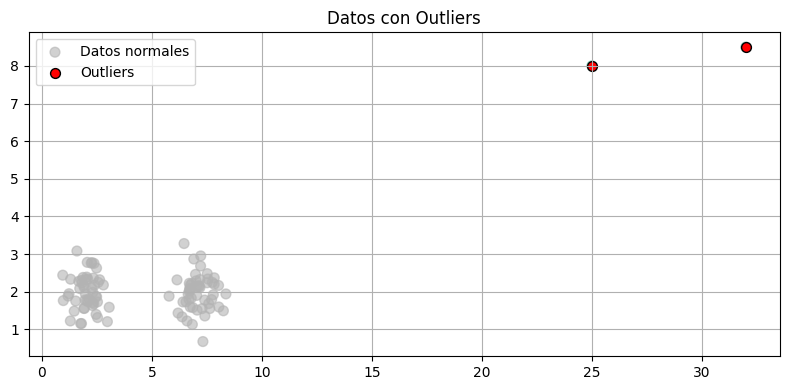

In [32]:
plotDataOutliers()

---❓--- 

En base al gráfico anterior:

1. ¿Donde crees que estarán los centroides si elegimos $K=2$?
2. ¿Y si elegimos $K=3$?

---❓---

💻 K-means agrupando datos con outliers 💻

Veamos qué sucede cuando aplicamos K-means a estos datos con outliers. En este caso eligiremos $K=2$
Por favor, ejecuta la siguiente celda para ver cómo K-means agrupa los datos.

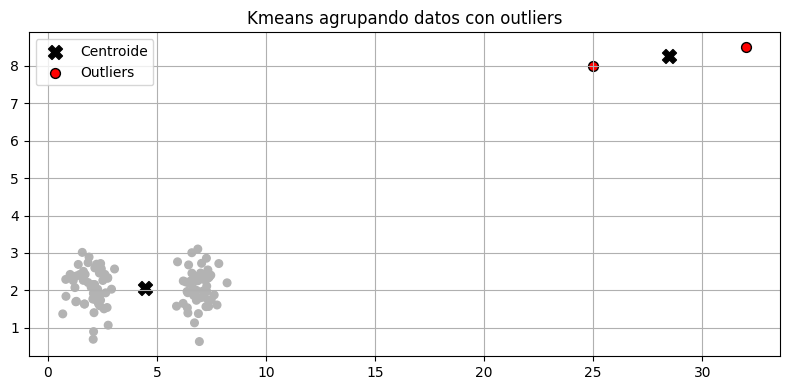

In [33]:
K=2
kmeansOutliers(K)

Claramente lo que vemos no es correcto. En el gráfico se ven dos grupos, no obstante, K-means ha agrupado los datos de manera incorrecta, ya que los outliers han influido en el resultado final.

Porba hacer $K=3$ o $K=4$ y observa qué sucede.

## 📘 <font color="#00b351">K-medoids</font>

Es un algoritmo de aprendizaje no supervisado que permite agrupar datos en grupos o clusters, sin necesidad de conocer previamente etiquetas o categorías.

Al igual que con K-means, el objetuivo es encontrar patrones por similitud en nuestros datos, organizándolos en k grupos distintos. Se supone que cada grupo reúne elementos que son más similares entre sí que con los elementos de otros grupos.

Sin embargo, <font color="#003fb3">los centroides **son datos reales** del conjunto llamados **medoides** y no el promedio de un grupo de nuestros datos.</font>

De manera resumida, el algoritmo de K-medoids lleva a cabo los siguientes pasos:

1. Se elige un número 𝐾 de puntos reales como candidatos (en general al azar).
2. Se asigna cada observación al medoide más cercano.
3. Se calcula el costo total del agrupamiento (ej. Suma de distancias a cada medoide).
4. Se reemplaza un medoide por otro punto del grupo y se ve si mejora el costo.
5. Si el costo mejora, se actualiza el medoide, si no, se mantiene.

Repetimos los pasos 3 a 5 hasta que no haya mejoras.

> A diferencia de K-means, el cual actualiza los centroides con el promedio, en K-medoids se eligen siempre puntos reales de nuestros datos.

#### 📊 **<font color="#00b351">Usando K-medoids para tratar con outliers</font>**

En este ejemplo, veremos cómo funciona K-medoids con el set de datos con outliers que vimos anteriormente.

Por favor, ejecuta la siguiente celda para ver cómo K-medoids agrupa los datos.

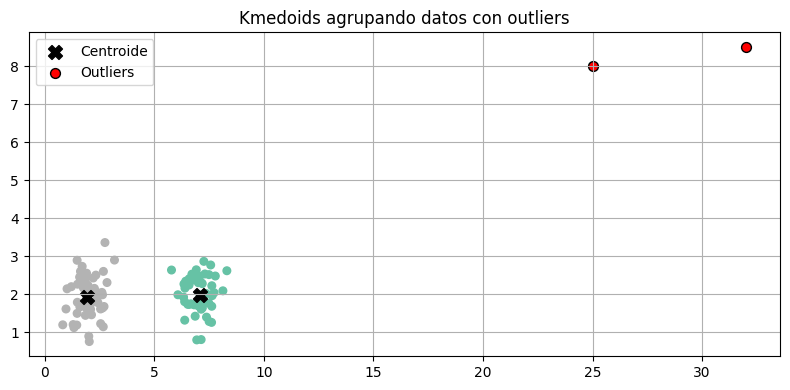

In [34]:
K=2
kmedoidsOutliers(K)

Como podemos ver, K-medoids logra agrupar los datos de manera correcta, ya que los outliers no influyen en el resultado final. Esto se debe a que K-medoids utiliza puntos reales como centros de los grupos, lo que lo hace menos sensible a los outliers en comparación con K-means.

Porba hacer $K=3$ o $K=4$ y observa qué sucede.

---❓--- ¿Qué diferencias ves entre K-means y K-medoids al agrupar con estos valores de $K$? ---❓---

---

## 📘 <font color="#00b351">Determinando cantidad de grupos</font>

Una de las principales preguntas que surge al usar K-means o K-medoids es: ¿Cómo determinar el número óptimo de grupos/clústeres (K) en mis datos? podemos tener en cuenta varios métodos para ayudarnos a decidir el valor de K, entre ellos:

- Método del codo (Elbow Method)
- Coeficiente de silueta o *Silhouette score*
- Índice Davies-Bouldin 
- Entre otros.

En este ejemplo, veremos el método del codo.

#### 📊 <font color="#d6b302">Determinando cantidad de grupos</font>

Sabemos que para K-means o K-medoids debemos elegir inicialmente cuántos grupos queremos formar. Esta decisión no es trivial, ya que,

1. Si elegimos pocos grupos, corremos el riesgo de agrupar cosas diferentes.
2. Si elegimos muchos grupos, podríamos sobresegmentar.

En ete ejemplo, usaremos el método del codo para determinar el número óptimo de grupos en un conjunto de datos.

El método del codo sirve para seleccionar una cantidad de grupos/clústeres a partir graficar la **inercia** o **el costo de agrupamiento** a medida que se aumenta el número de grupos. Es una estrategia intuitiva y práctica para ayudarnos a definir el número óptimo de grupos.

<font color="#3002d6">La inercia mide qué tan compactos están los grupos formados</font>. Se calcula como la suma de las distancias al cuadrado entre cada punto y el centroide de su grupo. A medida que aumentamos el número de grupos, la inercia tiende a disminuir, ya que los puntos están más cerca de sus centroides.

💻 Graficando datos originales 💻

Volvamos a graficar nuestros datos de ejemplo, por favor, ejecutá la celda de abajo.

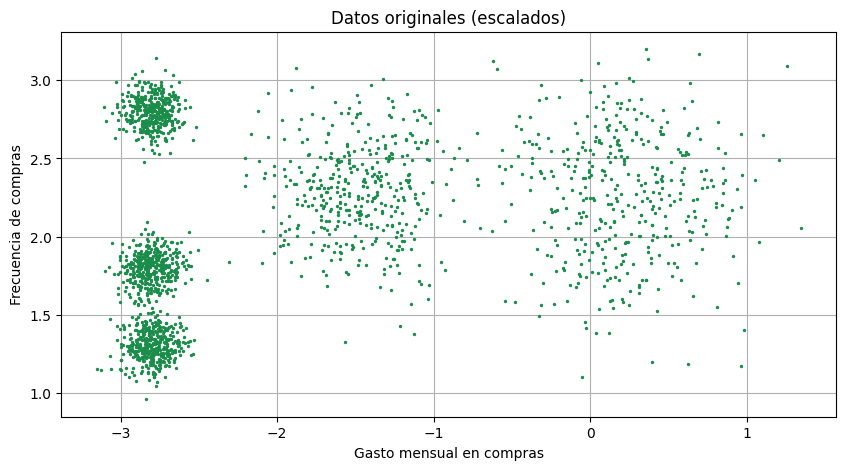

In [35]:
makeAndPlotBlobs()

---❓--- ¿Cuántos grupos/clústeres deberíamos elegir? ---❓--- 

💻 Método del codo 💻

Lo que vamos a hacer ahora es utilizar el método del codo para determinar el número óptimo de grupos en nuestros datos. Para ello, vamos a calcular la inercia para diferentes valores de K (número de grupos) y graficar el resultado.

Por favor, ejecutá la celda de abajo para calcular y graficar la inercia.

Agrupando para K=1, Inercia=3534.84
Agrupando para K=2, Inercia=1149.62
Agrupando para K=3, Inercia=653.22
Agrupando para K=4, Inercia=261.80
Agrupando para K=5, Inercia=219.43
Agrupando para K=6, Inercia=169.27
Agrupando para K=7, Inercia=141.80
Agrupando para K=8, Inercia=119.22
Agrupando para K=9, Inercia=102.51
Agrupando para K=10, Inercia=92.62
Agrupando para K=11, Inercia=86.31
Agrupando para K=12, Inercia=79.87
Agrupando para K=13, Inercia=74.52
Agrupando para K=14, Inercia=70.33
Agrupando para K=15, Inercia=67.37
Agrupando para K=16, Inercia=64.59
Agrupando para K=17, Inercia=61.65
Agrupando para K=18, Inercia=58.82
Agrupando para K=19, Inercia=56.62
Agrupando para K=20, Inercia=53.96
Agrupando para K=21, Inercia=51.39
Agrupando para K=22, Inercia=49.77
Agrupando para K=23, Inercia=47.68
Agrupando para K=24, Inercia=45.93
Agrupando para K=25, Inercia=43.77
Agrupando para K=26, Inercia=41.77
Agrupando para K=27, Inercia=40.66
Agrupando para K=28, Inercia=38.97
Agrupando para K=2

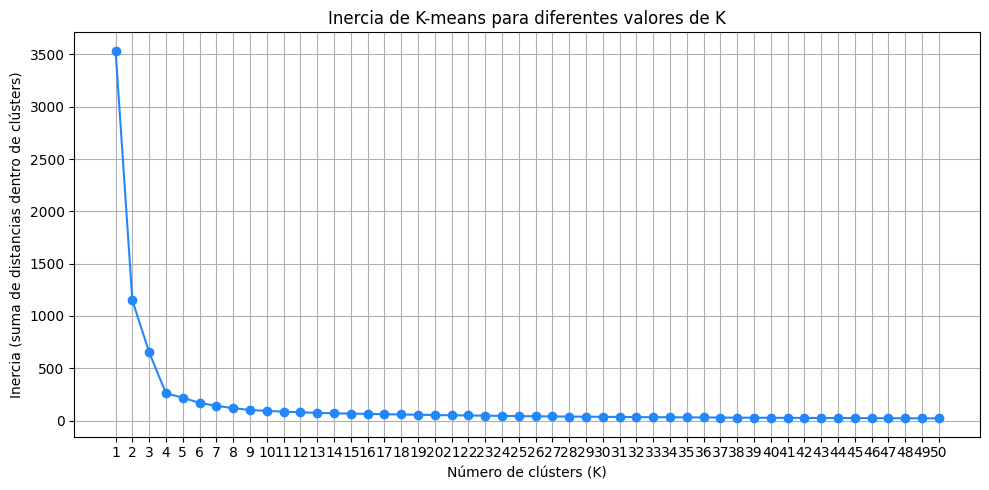

In [46]:
getElbow(max_k=50, printear=True)

---❓--- 

1. En base al gráfico anterior, ¿Cuántos grupos/clústeres deberíamos elegir?
2. ¿Qué sucede con el valor de inercia a medida que crece $K$?
3. ¿En algún momento la inercia deja de disminuir?

---❓--- 

💻 Agruando según el $K$ determinado por el método del codo 💻

En base a tu respuesta, ejecuta la siguiente línea de código modificando el valor K en base a tu elección.

He iniciado K = 20, sólo para marcar la muy mala elección que sería elegir 20 grupos/clústeres.

Por favor, modifica el valor de K y ejecuta la celda nuevamente.

Inercia para K=4: 261.80


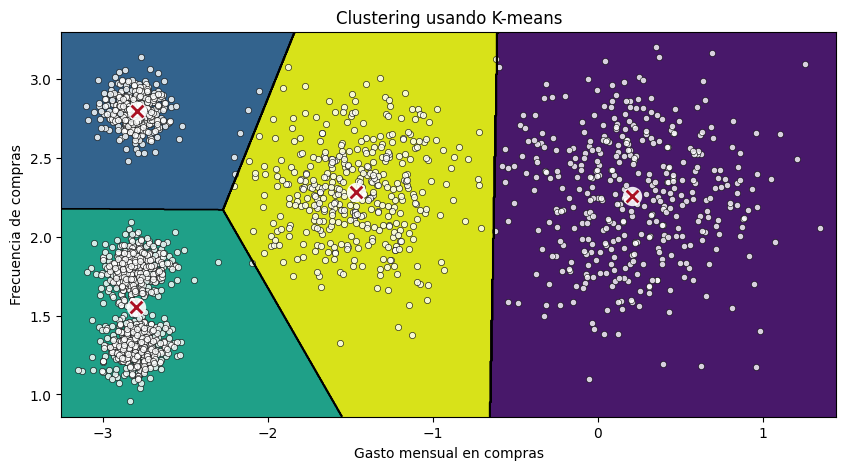

In [53]:
K=4
clusteringAndPlot(K,n_samples=2000,getInercia=True)

# K=2000
# clusteringAndPlot(K,n_samples=2000,getInercia=False)

---❓--- 

1. ¿Crees que tu elección de K es adecuada? ¿Por qué?
2. La cantidad de puntos en el gráfico anterior es de $2000$, ¿qué pasa con el valor de inercia cuando $K=2000$? ¿por qué?

---❓--- 

### 📘 <font color="#0033b3">Comentarios finales</font>

Hemos revisado el funcionamiento, de manera básica, de los algoritmos K-means y K-medoids. Hemos comprobado qué sucede cuando se eligen diferentes cantidades de grupos a través del parámetro $K$.

Es importante mencionar que no hemos explorado en profundidad otros aspectos importantes de estos algoritmos, como la selección de características, la escalabilidad o la interpretación de los resultados. Estos son temas que podrían ser objeto de análisis en trabajos futuros, dado que son cruciales para el rendimiento y la aplicabilidad de los algoritmos de clustering en escenarios del mundo real. A modo de ejemplo, escalar los datos a través de algún método (como la normalización o estandarización) puede tener un impacto significativo en los resultados del clustering, dado que estos son susceptibles a la escala de los datos.

Por otro lado, en estos ejemplos hemos usado como método de cálculo de la distancia entre clusters la distancia euclidiana, pero existen otros métodos (como la distancia de Manhattan, entre otros) que podrían ser más adecuados en ciertos contextos.

A través del método del codo hemos podido visualizar la inercia en función del número de clusters $K$, lo que nos ayuda a identificar un valor óptimo para $K$. Sin embargo, la elección final de $K$ puede depender del contexto y de los objetivos específicos del análisis. Por otro lado, no siempre es tan fácil determinar el número óptimo de clusters, debido a que la curva de inercia vs número de grupos no siempre es clara, y en algunos casos puede ser necesario realizar un análisis más profundo o utilizar técnicas adicionales para llegar a una conclusión. Veremos otras métricas más adelante en el curso que serán un complemento al método del codo y nos ayudarán a definir el número óptimo de clusters.


---
FIN